In [14]:
# 导包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
#读取数据
import pandas as pd

data = pd.read_csv("/MyCode/机器学习/data/ex2data1.txt", header=None, names=['exam1','exam2','isPassed'])
data

,exam1,exam2,isPassed
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


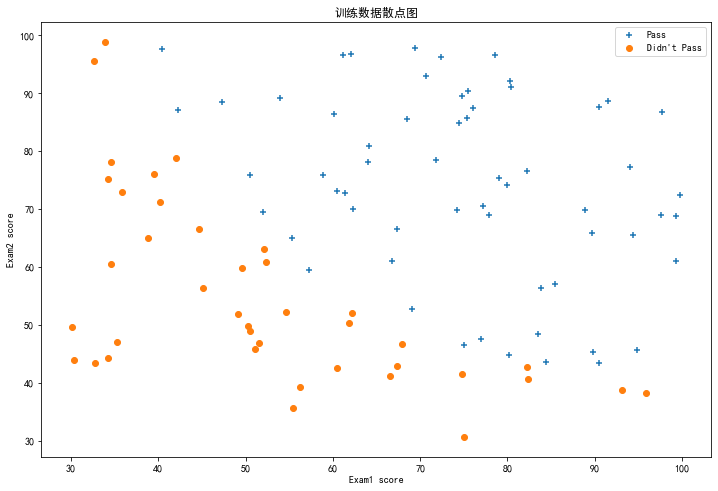

In [16]:
# 绘制数据看看数据的分布情况
# 数据可视化
import matplotlib.pyplot as plt

isPass = data[data['isPassed'].isin([1])]
noPass = data[data['isPassed'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(isPass['exam1'], isPass['exam2'], marker='+', label='Pass')
ax.scatter(noPass['exam1'], noPass['exam2'], marker='o', label="Didn't Pass")
ax.legend(loc=1)
ax.set_xlabel('Exam1 score')
ax.set_ylabel('Exam2 score')
ax.set_title("训练数据散点图")
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.show()

In [17]:
#在逻辑回归模型中，x0=1,即训练数据应该添加一列，值为1
data.insert(0, 'ones',1)
loc=data.shape[1]
X=np.array(data.iloc[:,0:loc-1])
Y=np.array(data.iloc[:,loc-1:loc])
theta=np.zeros(X.shape[1]) 
X.shape,Y.shape,theta.shape

((100, 3), (100, 1), (3,))

In [18]:
# sigmoid函数
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [19]:
# 逻辑回归代价函数
def computeCost(theta,X,Y):
    theta = np.matrix(theta)  # 不能缺少，因为参数theta是一维数组，进行矩阵想乘时要把theta先转换为矩阵
    h = sigmoid(np.dot(X, (theta.T)))
    a = np.multiply(-Y, np.log(h))
    b = np.multiply((1-Y), np.log(1-h))
    return np.sum(a-b)/len(X)

In [20]:
# 梯度函数
def gradient(theta,X,Y):
    theta = np.matrix(theta) #要先把theta转化为矩阵
    h = sigmoid(np.dot(X, (theta.T)))
    grad = np.dot(((h-Y).T), X)/len(X)
    return np.array(grad).flatten()  #因为下面寻找最优化参数的函数（opt.fmin_tnc())要求传入的gradient函返回值需要是一维数组，因此需要利用flatten（）将grad进行转换以下

In [21]:
# 寻找最优化参数（scipy.opt.fmin_tnc()函数）
import scipy.optimize as opt

result = opt.fmin_tnc(func=computeCost, x0=theta, fprime=gradient, args=(X, Y)) 
print(result)
theta=result[0]

(array([-25.16131865,   0.20623159,   0.20147149]), 36, 0)


In [22]:
def predict(theta, X):
    res = []
    theta = np.matrix(theta)
    temp = sigmoid(X * theta.T)
    for x in temp:
        if x >= 0.5:
            res.append(1)
        else:
            res.append(0)
    return res

predictValues=predict(theta,X)
hypothesis = []    
for (a, b) in zip(predictValues, Y):
    if a == b:
        hypothesis.append(1)
    else:
        hypothesis.append(0)

accuracy=hypothesis.count(1)/len(hypothesis)
print ('accuracy = {0}%'.format(accuracy*100))

accuracy = 89.0%


In [23]:
def predict(theta, X):
    res = []
    theta = np.matrix(theta)
    temp = sigmoid(X * theta.T)
    for x in temp:
        if x >= 0.5:
            res.append(1)
        else:
            res.append(0)
    return res
    # return [1 if x >= 0.5 else 0 for x in temp]

predictValues=predict(theta,X)
print(predictValues)

[0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1]


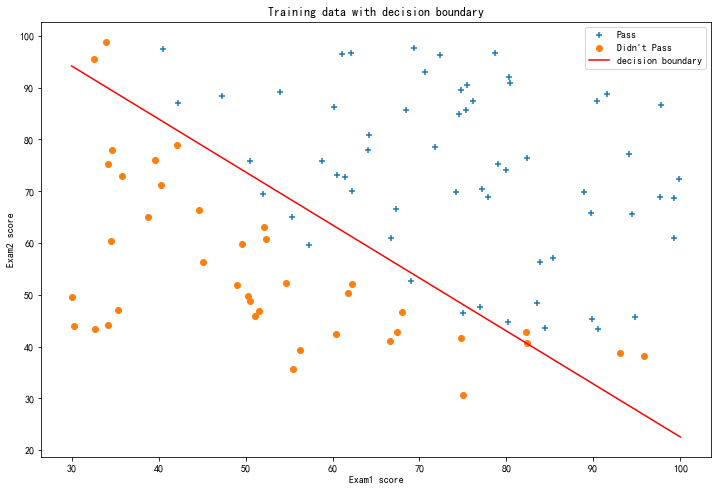

In [24]:
#决策边界
def find_x2(x1,theta):
    return [(-theta[0]-theta[1]*x_1)/theta[2] for x_1 in x1]
x1 = np.linspace(30, 100, 1000)
x2=find_x2(x1,theta)

#数据可视化
#数据可视化
isPass=data[data['isPassed'].isin([1])]
noPass=data[data['isPassed'].isin([0])]
fig,ax=plt.subplots(figsize=(12,8))
ax.scatter(isPass['exam1'], isPass['exam2'], marker='+', label='Pass')
ax.scatter(noPass['exam1'], noPass['exam2'], marker='o', label="Didn't Pass")
# ax.scatter(admittedData['exam1'],admittedData['exam2'],marker='+',label='addmitted')
# ax.scatter(noAdmittedData['exam2'],noAdmittedData['exam1'],marker='o',label="not addmitted")
ax.plot(x1,x2,color='r',label="decision boundary")
ax.legend(loc=1)
ax.set_xlabel('Exam1 score')
ax.set_ylabel('Exam2 score')
ax.set_title("Training data with decision boundary")
plt.show()

In [25]:
import pandas as pd

data = pd.read_csv("/MyCode/机器学习/data/ex2data1.txt", header=None, names=['exam1','exam2','isAdmitted'])
data

,exam1,exam2,isAdmitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


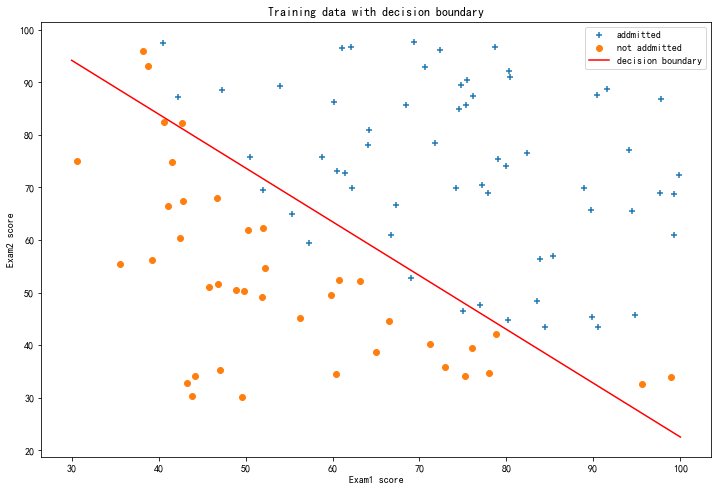

In [26]:
#决策边界
def find_x2(x1,theta):
    return [(-theta[0]-theta[1]*x_1)/theta[2] for x_1 in x1]
x1 = np.linspace(30, 100, 1000)
x2=find_x2(x1,theta)

#数据可视化
#数据可视化
admittedData=data[data['isAdmitted'].isin([1])]
noAdmittedData=data[data['isAdmitted'].isin([0])]
fig,ax=plt.subplots(figsize=(12,8))
ax.scatter(admittedData['exam1'],admittedData['exam2'],marker='+',label='addmitted')
ax.scatter(noAdmittedData['exam2'],noAdmittedData['exam1'],marker='o',label="not addmitted")
ax.plot(x1,x2,color='r',label="decision boundary")
ax.legend(loc=1)
ax.set_xlabel('Exam1 score')
ax.set_ylabel('Exam2 score')
ax.set_title("Training data with decision boundary")
plt.show()

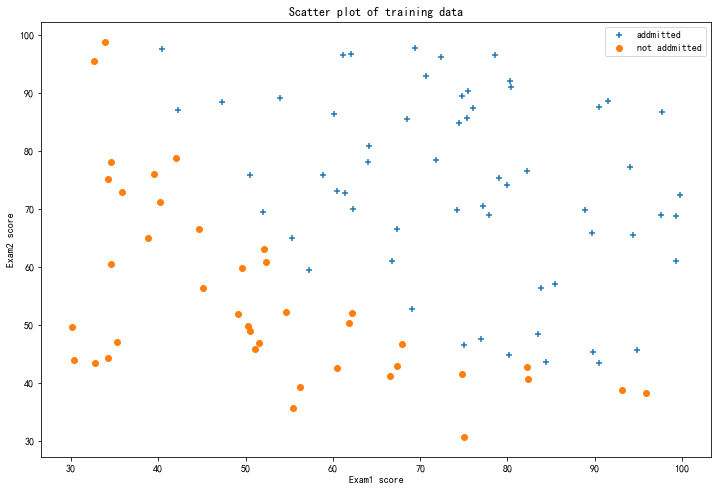

accuracy = 89.0%


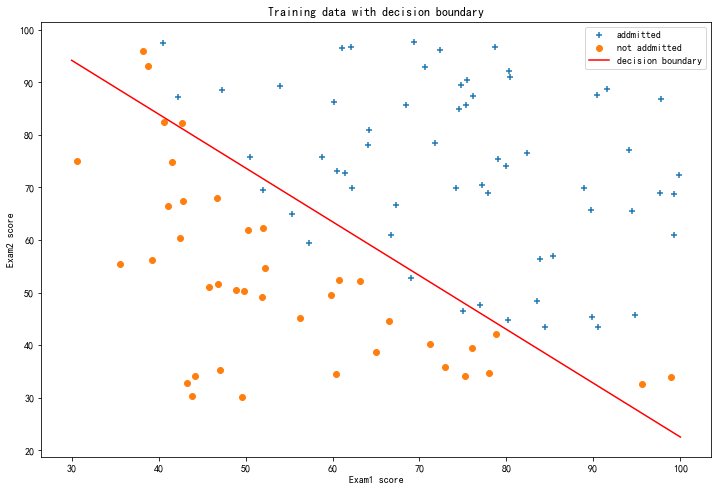

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

#sigmoid函数
def sigmoid(z):
    return 1/(1+np.exp(-z))
    
#代价函数
def computeCost(theta,X,Y):
    theta = np.matrix(theta) #不能缺少，因为参数theta是一维数组，进行矩阵想乘时要把theta先转换为矩阵
    h=sigmoid(np.dot(X,(theta.T)))
    a=np.multiply(-Y,np.log(h))
    b=np.multiply((1-Y),np.log(1-h))
    return np.sum(a-b)/len(X)

#梯度函数
def gradient(theta,X,Y):
    theta = np.matrix(theta) #要先把theta转化为矩阵
    h=sigmoid(np.dot(X,(theta.T)))
    grad=np.dot(((h-Y).T),X)/len(X)
    return np.array(grad).flatten()  #因为下面寻找最优化参数的函数（opt.fmin_tnc())要求传入的gradient函返回值需要是一维数组，因此需要利用flatten（）将grad进行转换以下

#模型预测
def predict(theta, X):
    theta = np.matrix(theta)
    temp = sigmoid(X * theta.T)
    #print(temp)
    return [1 if x >= 0.5 else 0 for x in temp]
    
#决策边界
def find_x2(x1,theta):
    return [(-theta[0]-theta[1]*x_1)/theta[2] for x_1 in x1]
    
#读取数据
data=pd.read_csv("/MyCode/机器学习/data/ex2data1.txt",delimiter=',',header=None,names=['exam1','exam2','isAdmitted'])

#数据可视化，看一下数据分布情况
admittedData=data[data['isAdmitted'].isin([1])]
noAdmittedData=data[data['isAdmitted'].isin([0])]
fig,ax=plt.subplots(figsize=(12,8))
ax.scatter(admittedData['exam1'],admittedData['exam2'],marker='+',label='addmitted')
ax.scatter(noAdmittedData['exam1'],noAdmittedData['exam2'],marker='o',label="not addmitted")
ax.legend(loc=1)
ax.set_xlabel('Exam1 score')
ax.set_ylabel('Exam2 score')
ax.set_title("Scatter plot of training data")
plt.show()

#数据预处理
data.insert(0, 'ones',1)
loc=data.shape[1]
X=np.array(data.iloc[:,0:loc-1])
Y=np.array(data.iloc[:,loc-1:loc])
theta=np.zeros(X.shape[1]) 
X.shape,Y.shape,theta.shape

#寻找最优化参数theta
result = opt.fmin_tnc(func=computeCost, x0=theta, fprime=gradient, args=(X, Y)) 
theta=result[0]

#模型评估（准确率计算）
predictValues=predict(theta,X)
hypothesis=[1 if a==b else 0 for (a,b)in zip(predictValues,Y)]
accuracy=hypothesis.count(1)/len(hypothesis)
print ('accuracy = {0}%'.format(accuracy*100))

#决策边界，数据可视化
x1 = np.linspace(30, 100, 1000)
x2=find_x2(x1,theta)
admittedData=data[data['isAdmitted'].isin([1])]
noAdmittedData=data[data['isAdmitted'].isin([0])]
fig,ax=plt.subplots(figsize=(12,8))
ax.scatter(admittedData['exam1'],admittedData['exam2'],marker='+',label='addmitted')
ax.scatter(noAdmittedData['exam2'],noAdmittedData['exam1'],marker='o',label="not addmitted")
ax.plot(x1,x2,color='r',label="decision boundary")
ax.legend(loc=1)
ax.set_xlabel('Exam1 score')
ax.set_ylabel('Exam2 score')
ax.set_title("Training data with decision boundary")
plt.show()

In [28]:
## 我们利用 sklearn 中自带的 iris 数据作为数据载入，并利用Pandas转化为DataFrame格式
from sklearn.datasets import load_iris
# data = load_iris() #得到数据特征
# iris_target = data.target #得到数据对应的标签
iris_features = pd.DataFrame(data=data.data, columns=data.feature_names) #利用Pandas转化为DataFrame格式
iris_features

AttributeError: 'DataFrame' object has no attribute 'data'

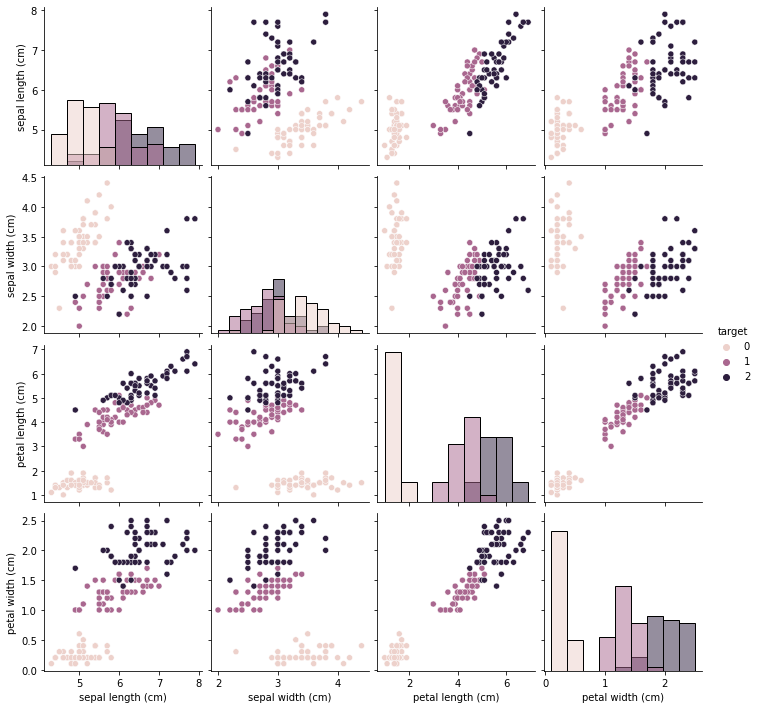

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
data = load_iris() #得到数据特征
iris_target = data.target #得到数据对应的标签
iris_features = pd.DataFrame(data=data.data, columns=data.feature_names) #利用Pandas转化为DataFrame格式
# 合并标签和特征信息
iris_all = iris_features.copy() ## 进行浅拷贝，防止对于原始数据的修改
iris_all['target'] = iris_target
# 特征与标签组合的散点可视化
# 在2D情况下不同的特征组合对于不同类别的花的散点分布，以及大概的区分能力。
sns.pairplot(data=iris_all,diag_kind='hist', hue= 'target')
plt.show()

逻辑回归的权重：
 [[-0.45928925  0.83069892 -2.26606529 -0.99743983]
 [ 0.33117319 -0.72863426 -0.06841147 -0.98711029]
 [ 0.12811606 -0.10206466  2.33447676  1.98455011]]
逻辑回归的截距(w0):
 [  9.43880649   3.93047365 -13.36928015]
逻辑回归准确度: 0.9833333333333333
逻辑回归准确度: 0.8666666666666667
混淆矩阵结果：
 [[10  0  0]
 [ 0  8  2]
 [ 0  2  8]]


C:\Users\LM216\AppData\Local\Temp\ipykernel_18928\1289132346.py:34: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig("fx.png")# 保存到本地
d:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


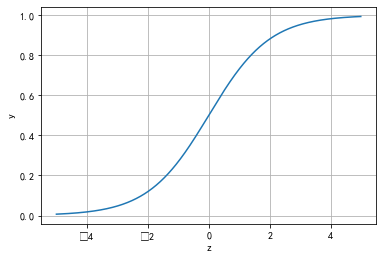

In [29]:
from sklearn.model_selection import train_test_split
# 从sklearn中导入逻辑回归模型
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 测试集大小为20%， 80%/20%分
x_train, x_test, y_train, y_test = train_test_split(iris_features, iris_target, test_size = 0.2, random_state = 2020)
## 定义 逻辑回归模型
clf = LogisticRegression()
# 在训练集上训练逻辑回归模型
clf.fit(x_train, y_train)
## 查看其对应的w
print('逻辑回归的权重：\n',clf.coef_)

## 查看其对应的w0
print('逻辑回归的截距(w0):\n',clf.intercept_)

## 因为3分类，所有我们这里得到了三个逻辑回归模型的参数，其三个逻辑回归组合起来即可实现三分类。
## 在训练集和测试集上分别利用训练好的模型进行预测
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('逻辑回归准确度:',metrics.accuracy_score(y_train,train_predict))
print('逻辑回归准确度:',metrics.accuracy_score(y_test,test_predict))
## 查看混淆矩阵
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('混淆矩阵结果：\n',confusion_matrix_result)

import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-5,5,0.01)# -5到5 步长为0.01
y = 1/(1+np.exp(-x))#Logistic函数

plt.plot(x,y)#x轴数据和y轴数据
plt.xlabel('z')
plt.ylabel('y')# x,y轴的标签
plt.grid() # 生成网格，便于观察
plt.savefig("fx.png")# 保存到本地
plt.show()